<a href="https://colab.research.google.com/github/mridulasankol/AI_SupplyChain/blob/main/OEMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy seaborn scikit-learn


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans


In [3]:

np.random.seed(42)
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Demand': np.random.randint(50, 150, size=100),
    'Inventory_Level': np.random.randint(500, 1000, size=100),
    'Supplier_Performance_Score': np.random.uniform(70, 100, size=100),
    'Lead_Time': np.random.randint(2, 10, size=100)
})


data.head()


,Date,Demand,Inventory_Level,Supplier_Performance_Score,Lead_Time
0,2023-01-01,101,909,83.696037,7
1,2023-01-02,142,716,76.553213,6
2,2023-01-03,64,751,82.495298,9
3,2023-01-04,121,687,96.498408,5
4,2023-01-05,110,879,79.730351,9


In [4]:

print(data.isnull().sum())


X = data[['Inventory_Level', 'Supplier_Performance_Score', 'Lead_Time']]
y = data['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Date                          0
Demand                        0
Inventory_Level               0
Supplier_Performance_Score    0
Lead_Time                     0
dtype: int64


Mean Squared Error: 1036.755775


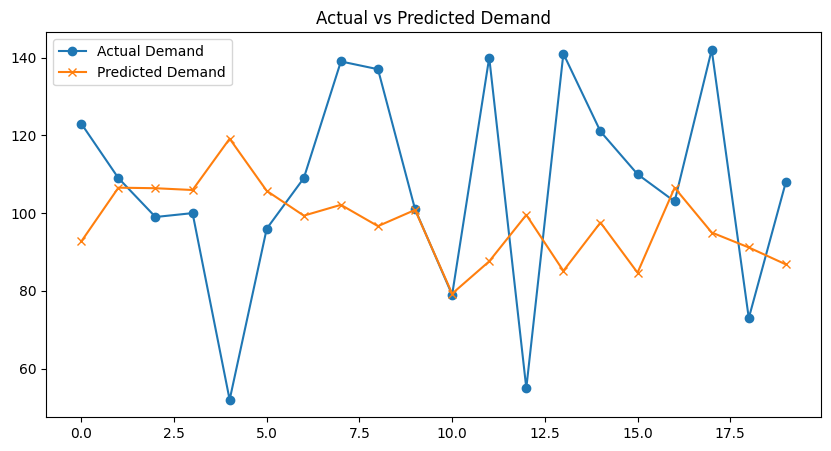

In [5]:

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Demand', marker='o')
plt.plot(y_pred, label='Predicted Demand', marker='x')
plt.legend()
plt.title('Actual vs Predicted Demand')
plt.show()


In [6]:

def optimize_inventory(current_inventory, predicted_demand):
    safety_stock = 0.2 * predicted_demand
    optimal_inventory = predicted_demand + safety_stock
    return optimal_inventory

optimized_inventory = [optimize_inventory(inv, pred) for inv, pred in zip(X_test['Inventory_Level'], y_pred)]

optimized_inventory[:5]


[111.264, 127.84800000000001, 127.68, 127.128, 142.96800000000002]

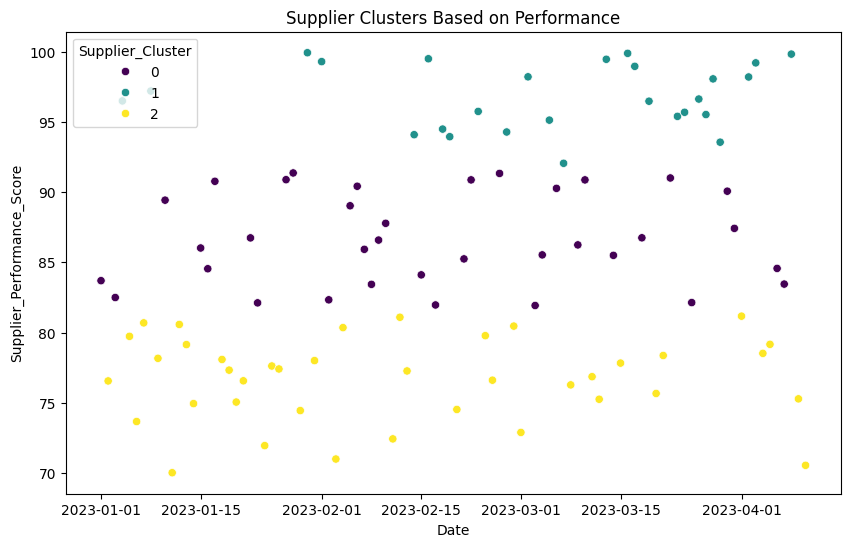

In [7]:

supplier_data = data[['Supplier_Performance_Score']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['Supplier_Cluster'] = kmeans.fit_predict(supplier_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Supplier_Performance_Score', hue='Supplier_Cluster', data=data, palette='viridis')
plt.title('Supplier Clusters Based on Performance')
plt.show()


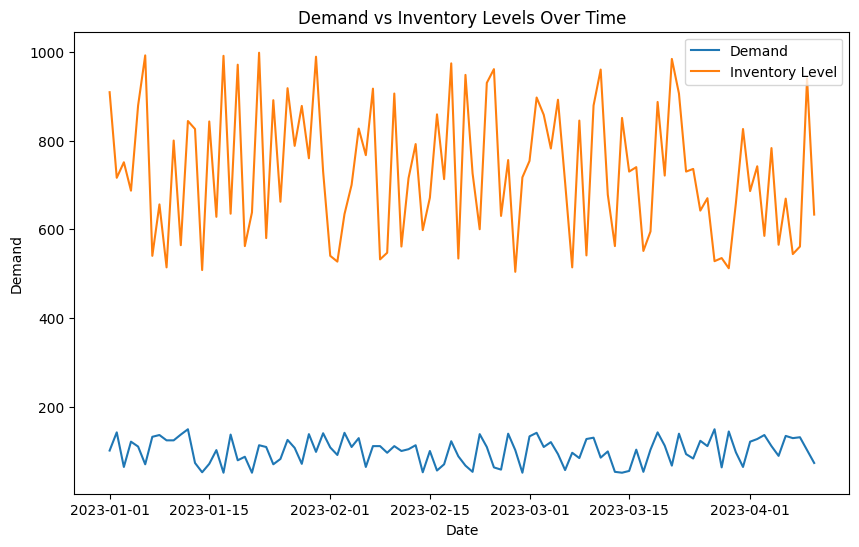

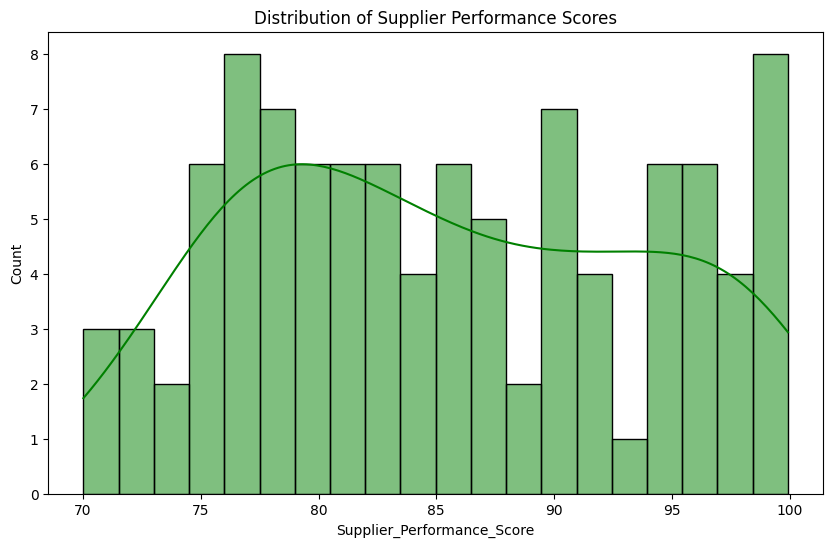

In [8]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Demand', data=data, label='Demand')
sns.lineplot(x='Date', y='Inventory_Level', data=data, label='Inventory Level')
plt.title('Demand vs Inventory Levels Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Supplier_Performance_Score'], bins=20, kde=True, color='green')
plt.title('Distribution of Supplier Performance Scores')
plt.show()
